In [13]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [14]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [15]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [64]:
"""
Dataframe
"""
df = pd.read_csv(database_data)
df

ValueError: Invalid file path or buffer object type: <class 'list'>

In [17]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,1669440299999,664.0,22.26316,1.669440e+09
1,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,1669440359999,579.0,13.33170,1.669440e+09
2,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1669440419999,1070.0,24.97511,1.669440e+09
3,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,1669440479999,715.0,27.98584,1.669440e+09
4,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,1669440539999,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1441,BTCBUSD,16549.68,16551.19,16548.52,16549.26,16.02875,-0.0025378134199688,1669526699999,434.0,8.61647,1.669527e+09
1441,1442,BTCBUSD,16549.88,16551.11,16547.27,16548.99,36.53197,-0.005377682496788,1669526759999,722.0,14.98359,1.669527e+09
1442,1444,BTCBUSD,16549.88,16551.11,16547.27,16548.99,36.53197,-0.005377682496788,1669526759999,722.0,14.98359,1.669527e+09
1443,1445,BTCBUSD,16549.88,16551.11,16547.27,16548.99,36.53197,-0.005377682496788,1669526759999,722.0,14.98359,1.669527e+09


In [18]:
"""
Candle Data Column
"""
df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
df_candle

,CloseTime,Open,High,Low,Close,VolumeBTC
0,1669440299999,16617.48,16622.19,16616.02,16621.68,33.78673
1,1669440359999,16621.97,16624.08,16620.13,16621.09,29.60535
2,1669440419999,16621.54,16625.95,16619.30,16621.87,49.48804
3,1669440479999,16621.96,16628.06,16620.83,16625.72,44.92542
4,1669440539999,16625.90,16630.99,16624.81,16630.26,42.83208
...,...,...,...,...,...,...
1440,1669526699999,16549.68,16551.19,16548.52,16549.26,16.02875
1441,1669526759999,16549.88,16551.11,16547.27,16548.99,36.53197
1442,1669526759999,16549.88,16551.11,16547.27,16548.99,36.53197
1443,1669526759999,16549.88,16551.11,16547.27,16548.99,36.53197


In [19]:
"""
Time Indexing
"""
df_candle = df.set_index('CloseTime')
df_candle.index = pd.to_datetime(df.index, unit='ms')

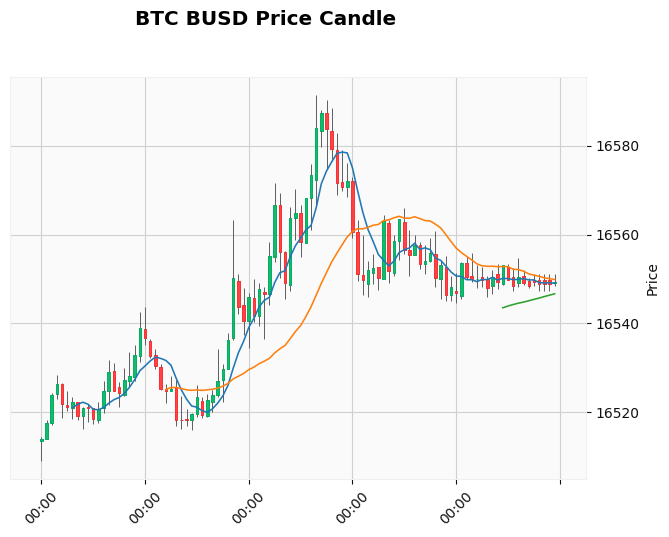

In [20]:
mpf.plot(
    df_candle.tail(100),
#     df,
    mav=[7, 25 , 90],
    type="candle",
#     type="renko",
    title=f"BTC BUSD Price Candle",
    style="yahoo",
)

In [21]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-11-27 03:49:59.999,1346,BTCBUSD,16513.50,16514.39,16509.00,16514.01,51.10555,0.00308838223270899,1149.0,21.36804,1.669521e+09
2022-11-27 03:50:59.999,1347,BTCBUSD,16513.95,16518.16,16513.95,16517.65,36.27149,0.022405299761721,741.0,24.07658,1.669521e+09
2022-11-27 03:51:59.999,1348,BTCBUSD,16517.67,16524.24,16517.13,16523.99,42.31776,0.0382620551203853,1063.0,24.34195,1.669521e+09
2022-11-27 03:52:59.999,1349,BTCBUSD,16524.05,16528.32,16523.05,16526.34,41.26286,0.013858587936982,1111.0,19.78188,1.669521e+09
2022-11-27 03:53:59.999,1350,BTCBUSD,16526.25,16526.56,16518.70,16521.84,35.17786,-0.0266848196051727,902.0,14.16965,1.669521e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 05:24:59.999,1441,BTCBUSD,16549.68,16551.19,16548.52,16549.26,16.02875,-0.0025378134199688,434.0,8.61647,1.669527e+09
2022-11-27 05:25:59.999,1442,BTCBUSD,16549.88,16551.11,16547.27,16548.99,36.53197,-0.005377682496788,722.0,14.98359,1.669527e+09
2022-11-27 05:25:59.999,1444,BTCBUSD,16549.88,16551.11,16547.27,16548.99,36.53197,-0.005377682496788,722.0,14.98359,1.669527e+09


In [22]:
# Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING[ENGULFING != 0]

CloseTime
2022-11-27 03:55:59.999    100
2022-11-27 04:03:59.999   -100
2022-11-27 04:05:59.999    100
2022-11-27 04:15:59.999   -100
2022-11-27 04:17:59.999   -100
2022-11-27 04:18:59.999    100
2022-11-27 04:21:59.999    100
2022-11-27 04:31:59.999    100
2022-11-27 04:37:59.999    100
2022-11-27 04:39:59.999   -100
2022-11-27 04:40:59.999    100
2022-11-27 04:48:59.999    100
2022-11-27 04:52:59.999    100
2022-11-27 04:54:59.999   -100
2022-11-27 04:55:59.999    100
2022-11-27 05:10:59.999    100
2022-11-27 05:14:59.999   -100
2022-11-27 05:18:59.999    100
dtype: int32

In [24]:
bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

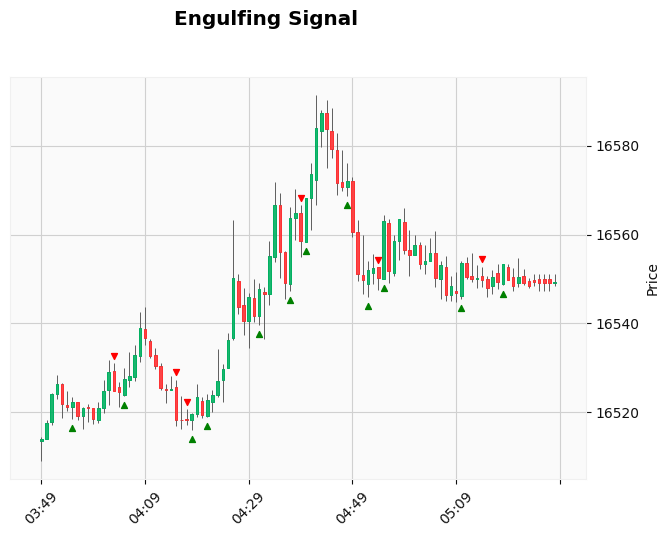

In [25]:
addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [136]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""
df=pd.read_csv(r"C:\Users\Soadul Rabbi\Downloads\Dummy - Sheet1.csv")
print(df)
X=df.iloc[:,1:3]

print(X)

                 Hammer   2  -100   Bearsh  1
0      Piercing Pattern   3   100  Bullish  0
1     Bullish Engulfing   4   100  Bullish  0
2      The Morning Star   5  -100   Bearsh  1
3  Three White Soldiers   6   100  Bullish  0
4        White Marubozu   7   100  Bullish  0
5       Three Inside Up   8  -100   Bearsh  1
6        Bullish Harami   9   100  Bullish  0
7        Tweezer Bottom  10  -100   Bearsh  1
    2  -100
0   3   100
1   4   100
2   5  -100
3   6   100
4   7   100
5   8  -100
6   9   100
7  10  -100


In [137]:
"""
y value for DecisionTreeClassifier

"""

y=df.iloc[:,-1]
print(y)


0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    1
Name: 1, dtype: int64


In [138]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [140]:
model.fit(X, y)

DecisionTreeClassifier()

In [147]:
# model.predict([  [40, 0],[60, 1] ])
model.predict([ [3,100] ])
print(model.predict([ [11,100] ]))

[0]


C:\Users\Soadul Rabbi\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Soadul Rabbi\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
